# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_1 = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')


# Display the data table for preview
df_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
mouse_count = len(df_1["Mouse ID"].unique())
mouse_count

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicated_mice = df_1[df_1.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicated_mice_array = np.array(duplicated_mice)
print(duplicated_mice_array)
                                                 

['g989' 'g989' 'g989' 'g989' 'g989']


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mice_data = df_1.loc[(df_1["Mouse ID"] == "g989")]
duplicated_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df_1.drop_duplicates(["Mouse ID"])
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
clean_df.duplicated(["Mouse ID"]).sum()

0

In [12]:
clean_df = pd.DataFrame(clean_df)


In [13]:
# Checking the number of mice in the clean DataFrame.

mouse_count_2 = clean_df["Mouse ID"].nunique()
mouse_count_2

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = df_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index()
mean_tumor.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"}, inplace=True)

median_tumor = df_1.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().reset_index()
median_tumor.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"}, inplace=True)


variance_tumor = df_1.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().reset_index()
variance_tumor.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"}, inplace=True)

st_tumor = df_1.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().reset_index()
st_tumor.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}, inplace=True)


err_tumor = df_1.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().reset_index()
err_tumor.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."}, inplace=True)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


tumor_volume_table = pd.merge(mean_tumor, median_tumor, on='Drug Regimen')
tumor_volume_table = pd.merge(tumor_volume_table, variance_tumor, on='Drug Regimen')
tumor_volume_table = pd.merge(tumor_volume_table, st_tumor, on='Drug Regimen')
tumor_volume_table = pd.merge(tumor_volume_table, err_tumor, on='Drug Regimen')
#Format
tumor_volume_table = tumor_volume_table.set_index("Drug Regimen")
tumor_volume_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_regimen = df_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean=np.mean, 
                                                                       median=np.median, 
                                                                       var=np.var, 
                                                                       std=np.std, 
                                                                       sem=st.sem).reset_index()

tumor_regimen = tumor_regimen.set_index("Drug Regimen")
tumor_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

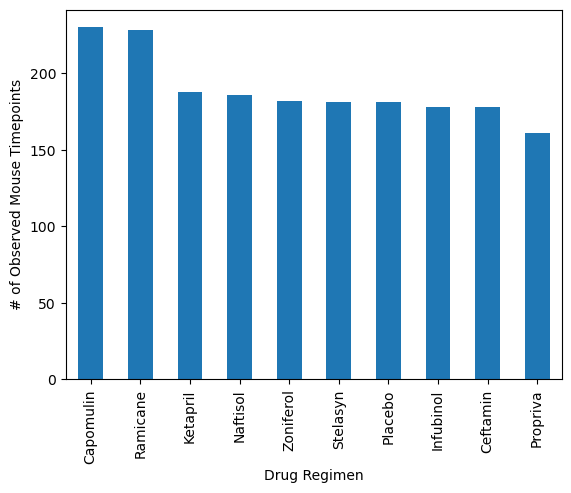

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_1 = df_1["Drug Regimen"].value_counts()
bar_1.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

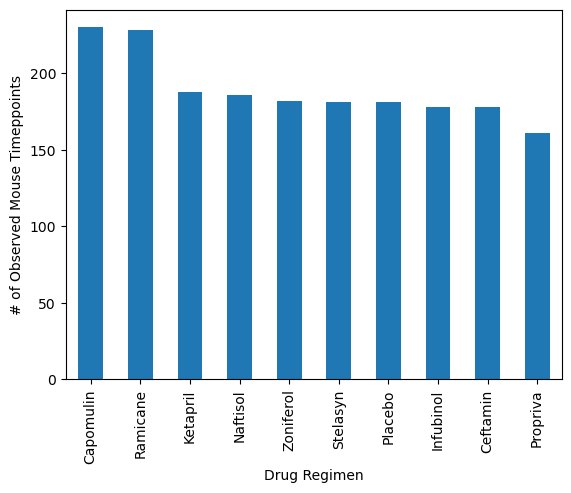

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar = df_1["Drug Regimen"].value_counts()
bar.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timeppoints")
plt.show()

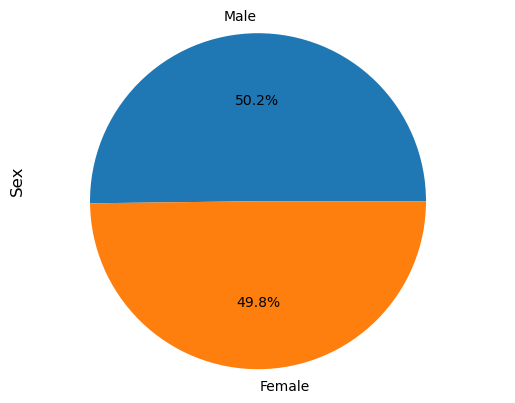

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_mice = mouse_metadata.Sex.value_counts()
plt.pie(pie_mice, labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Sex", loc="left",y=0.5, rotation=90)
plt.axis("equal")
plt.show()


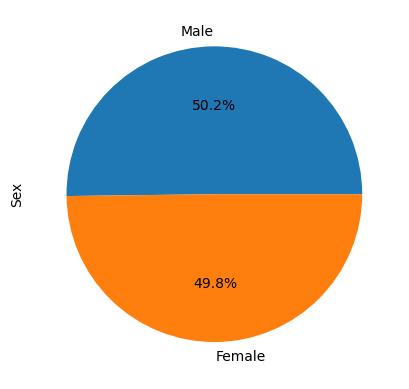

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pypl
lables = ["Female", "Male"]
plot = pie_mice.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mou

loop_plot = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for regimen in loop_plot:
    regimen_data = df_1[df_1['Drug Regimen'] == regimen]
    q1 = regimen_data['Tumor Volume (mm3)'].quantile(0.25)
    q3 = regimen_data['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 -q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower) | (regimen_data['Tumor Volume (mm3)'] > upper)]

    print(f"{regimen} potential outliers:\nIQR: {iqr}\nLower: {lower}\nUpper: {upper}")
    print("Potential Outliers")
    print(outliers)
    

Capomulin potential outliers:
IQR: 7.314067135000002
Lower: 26.714832162499995
Upper: 55.9711007025
Potential Outliers
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1699     s185         40           25.472143                 1    Capomulin   
1700     s185         45           23.343598                 1    Capomulin   

         Sex  Age_months  Weight (g)  
1699  Female           3          17  
1700  Female           3          17  
Ramicane potential outliers:
IQR: 8.325365415
Lower: 24.1865864625
Upper: 57.488048122500004
Potential Outliers
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
514     k403         45           22.050126                 1     Ramicane   

      Sex  Age_months  Weight (g)  
514  Male          21          16  
Infubinol potential outliers:
IQR: 10.002090667500006
Lower: 32.309217298749985
Upper: 72.31757996875001
Potential Outliers
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (

In [25]:
# Put treatments into a list for for loop (and later for plot labels)

plot_list = df_1.groupby("Mouse ID")
plot_list = plot_list["Timepoint"].max()
plot_list_df = pd.DataFrame(plot_list)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(plot_list_df, df_1, on = ["Mouse ID", "Timepoint"])

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
capomulin_volume = []
ramicane_volume = []
infubinol_volume = []
ceftamain_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        capomulin_volume.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        ramicane_volume.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        infubinol_volume.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        ceftamain_volume.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    
    
tumor_volume = [capomulin_volume, ramicane_volume, infubinol_volume, ceftamain_volume]

    # add subset 
outlier_list = []
for i in range(len(tumor_volume)):
    quartiles = pd.Series(tumor_volume[i]).quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper-lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    print(f"Potential outliers: {lower_bound} ")
    print(f"Potential outliers: {upper_bound} ")
    
   # Determine outliers using upper and lower bounds
for j in range(len(tumor_volume[i])):
        if (tumor_volume[i][j] < lower_bound) or (tumor_volume[i][j] > upper_bound):
            outlier = tumor_volume[i][j]
            outlier_list.append(outlier)
            print(f"The potential outliers are : {outlier_list}.")    

Potential outliers: 20.70456164999999 
Potential outliers: 51.83201549 
Potential outliers: 17.912664470000003 
Potential outliers: 54.30681135 
Potential outliers: 36.83290494999999 
Potential outliers: 82.74144559000001 
Potential outliers: 25.355449580000002 
Potential outliers: 87.66645829999999 


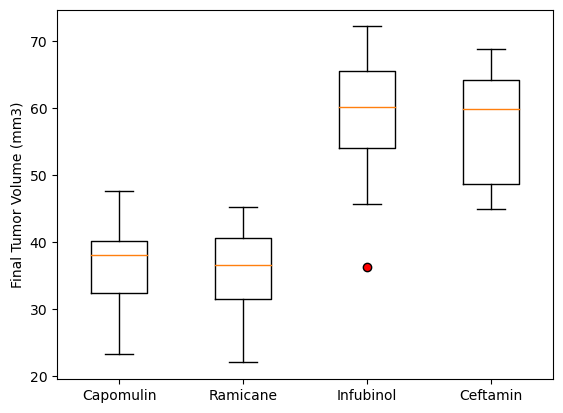

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

box_plot = dict(markerfacecolor = "r", marker = "o")
fig1, axl = plt.subplots()
axl.set_ylabel("Final Tumor Volume (mm3)")
axl.boxplot(tumor_volume, flierprops = box_plot)
axl.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

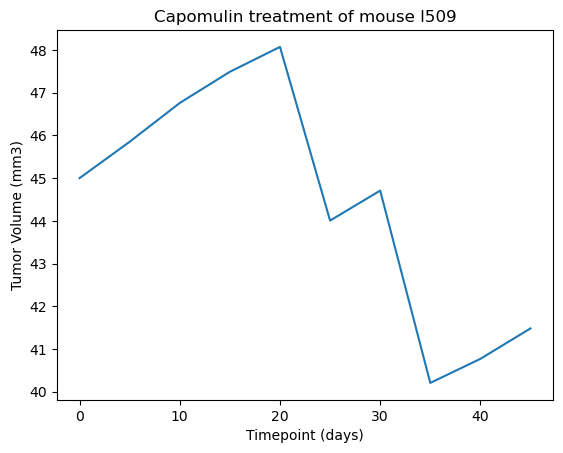

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_capomulin = df_1[(df_1["Drug Regimen"] == "Capomulin") & (df_1["Mouse ID"] == "l509")]

plt.plot(single_mouse_capomulin["Timepoint"], single_mouse_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

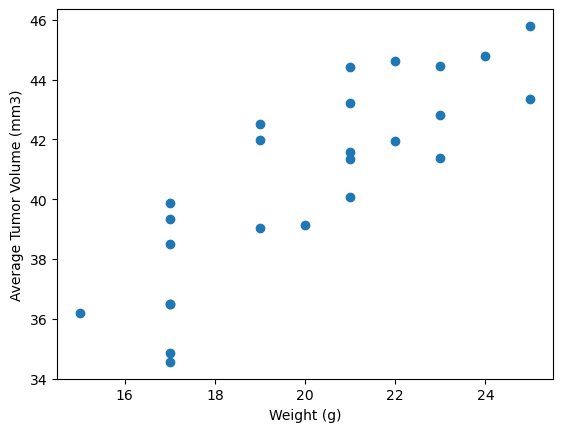

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = df_1.loc[df_1["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, average_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


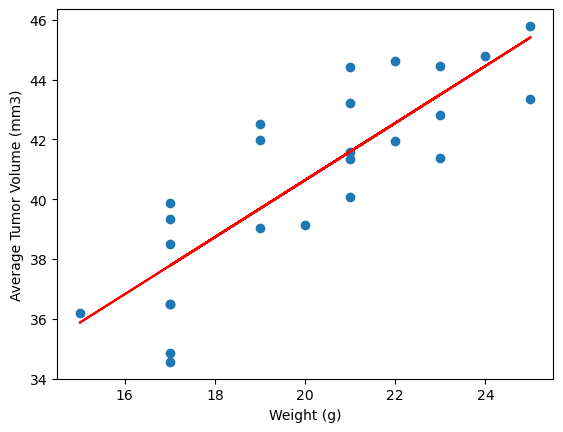

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, average_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_capomulin)
regression_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, average_tumor_capomulin)
plt.plot(mouse_weight,regression_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()
      